In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [33]:
customers = pd.read_csv('customers.csv')
products = pd.read_csv('products.csv')
transactions = pd.read_csv('transactions.csv')

## Convert dates to datetime format

In [34]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

## Merge datasets for clustering

In [35]:

merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')

## Feature Engineering for Clustering

In [36]:
customer_features = merged_data.groupby('CustomerID').agg(
    TotalSpend=('TotalValue', 'sum'),
    AvgTransactionValue=('TotalValue', 'mean'),
    TotalTransactions=('TransactionID', 'count'),
    MostPurchasedCategory=('Category', lambda x: x.value_counts().idxmax())
).reset_index()

## Encode categorical features

In [37]:
customer_features = pd.get_dummies(customer_features, columns=['MostPurchasedCategory'], drop_first=True)

## Normalize features

In [38]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop('CustomerID', axis=1))

## Clustering using K-Means

In [39]:
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
customer_features['Cluster'] = clusters

## Evaluate clustering performance

In [40]:
db_index = davies_bouldin_score(scaled_features, clusters)
print(f"Davies-Bouldin Index for {num_clusters} clusters: {db_index}")

Davies-Bouldin Index for 6 clusters: 1.2071146216854163


## Visualize clusters using PCA

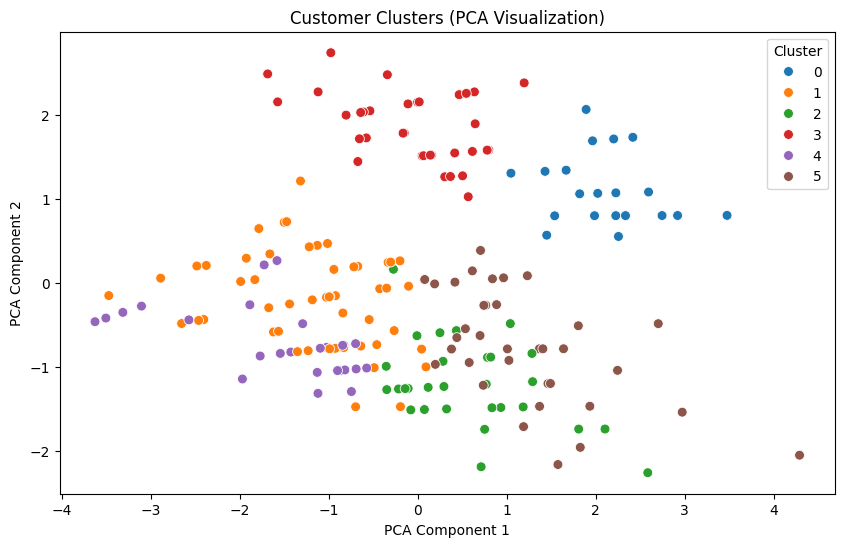

In [41]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
customer_features['PCA1'] = pca_features[:, 0]
customer_features['PCA2'] = pca_features[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=customer_features, palette='tab10', s=50
)
plt.title("Customer Clusters (PCA Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [43]:
print(f"Number of clusters formed: {num_clusters}")
print(f"Davies-Bouldin Index: {db_index}")

Number of clusters formed: 6
Davies-Bouldin Index: 1.2071146216854163
